# Convolutional Neural Networks (CNNs)

In [1]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
  Using cached rich-14.0.0-py3-none-any.whl (243 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


In [3]:
# Load data from Keras
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Print shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [5]:
# Show a few images
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

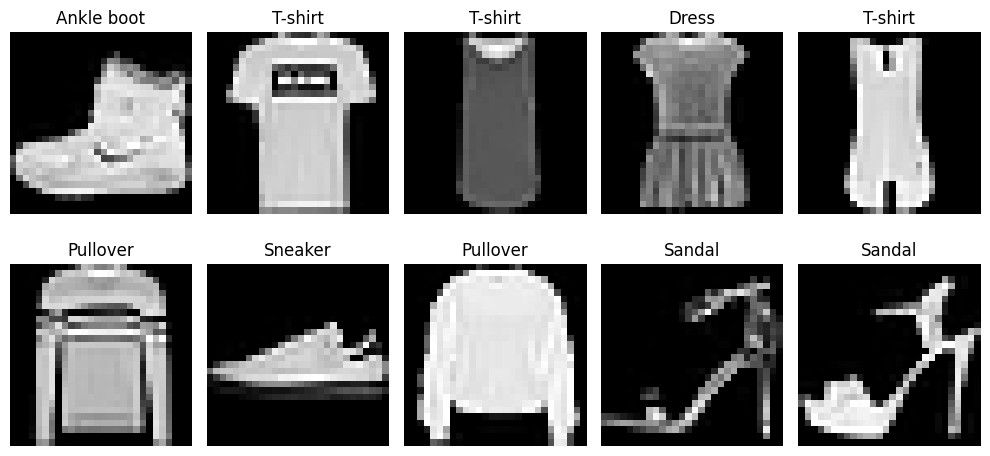

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [7]:
# Reshape to add channel dimension and normalize pixel values
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0


In [8]:
# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [9]:
model = Sequential([
    Input(shape=(28, 28, 1)),                     # Input Layer
    Conv2D(32, (3, 3), activation='relu'),        # Convolution + ReLU
    MaxPooling2D(pool_size=(2, 2)),               # Pooling Layer
    
    Conv2D(64, (3, 3), activation='relu'),        # Another Convolution
    MaxPooling2D(pool_size=(2, 2)),               # Pooling Again

    Flatten(),                                    # Flatten the 2D to 1D
    Dense(128, activation='relu'),                # Fully Connected Layer
    Dropout(0.3),                                 # Dropout for regularization
    Dense(10, activation='softmax')               # Output Layer (10 classes)
])

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# View summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test_cat),
    verbose=2
)

Epoch 1/10
938/938 - 17s - 18ms/step - accuracy: 0.8067 - loss: 0.5420 - val_accuracy: 0.8615 - val_loss: 0.3827
Epoch 2/10
938/938 - 16s - 17ms/step - accuracy: 0.8699 - loss: 0.3562 - val_accuracy: 0.8800 - val_loss: 0.3339
Epoch 3/10
938/938 - 16s - 17ms/step - accuracy: 0.8872 - loss: 0.3074 - val_accuracy: 0.8941 - val_loss: 0.2903
Epoch 4/10
938/938 - 17s - 18ms/step - accuracy: 0.8992 - loss: 0.2775 - val_accuracy: 0.8884 - val_loss: 0.3052
Epoch 5/10
938/938 - 23s - 24ms/step - accuracy: 0.9072 - loss: 0.2531 - val_accuracy: 0.9052 - val_loss: 0.2667
Epoch 6/10
938/938 - 27s - 28ms/step - accuracy: 0.9139 - loss: 0.2333 - val_accuracy: 0.9061 - val_loss: 0.2572
Epoch 7/10
938/938 - 25s - 27ms/step - accuracy: 0.9188 - loss: 0.2177 - val_accuracy: 0.9062 - val_loss: 0.2630
Epoch 8/10
938/938 - 34s - 36ms/step - accuracy: 0.9234 - loss: 0.2019 - val_accuracy: 0.9090 - val_loss: 0.2582
Epoch 9/10
938/938 - 76s - 81ms/step - accuracy: 0.9286 - loss: 0.1898 - val_accuracy: 0.9099 - 

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9084 - loss: 0.2554
Test Accuracy: 0.9083


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


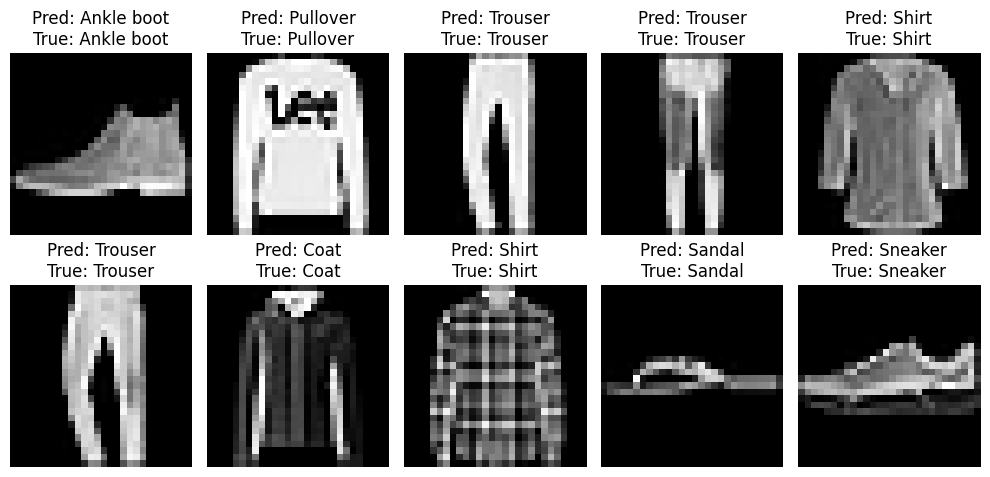

In [14]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()